# Data Analysis  

#### Equity analysis amongst global renowned companies. 

This analysis aims to perform miscellaneous data analysis and 
data visualization operations using Python for eight globally renowned companies' 
equity(stock) prices and volume between the years 2012 and 2020. The project 
covers concepts from Python libraries like NumPy, pandas, Matplotlib, Scikit-learn 
and core concepts of Machine Learning to perform Regression Analysis for a linear 
data model.

The project aims to analyze the tabular data and compare the various equities at 
different modules to abstract information like:
1. Which equity is been least volatile or showed leaser Price Fluctuation Range 
between the year 2012 to 2020,
2. Which equity is been highly volatile or showed highest Price Fluctuation 
Range between the year 2012 to 2020,
3. Which equity/equities, a portfolio should have depending upon its nature 
(Less risk but with lower returns, Higher risk but may give greater returns),
4. The market correlation concerning specific equity,
5. Visualizing correlation, normalized growth, and Price Fluctuation Range, and
6. Performing Ridge regression to trace volume growth between 2012 to 2020.

##### 1.1 Importing requried Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.linear_model import Ridge

print("imported all the requried libraries")

imported all the requried libraries


##### 1.2 Importing the datasets

In [3]:
# Dataset-1

stocks_df = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\stocks.csv")

stocks_df = stocks_df.sort_values(by=['Date'])                 #sorting the rows in ascending Dates (from 2012 to 2020)
stocks_df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [4]:
# Dataset-2

stock_volume_df = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\stock_volume.csv")

stock_volume_df = stock_volume_df.sort_values(by=['Date'])    #sorting the rows in ascending Dates (from 2012 to 2020)
stock_volume_df.tail()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
2154,2020-08-05,30498000,46551000,22991700,18914200,3930000,3675400,4978000,1979500,4732220000
2155,2020-08-06,50607200,32921600,21908700,35867700,3940600,3417100,5992300,1995400,4267490000
2156,2020-08-07,49453300,19301600,30398500,34530300,3929600,3651000,8883500,1576600,4104860000
2157,2020-08-10,53100900,35857700,35514400,71219700,3167300,3968300,7522300,1289300,4318570000
2158,2020-08-11,46871100,60966900,30978300,34357900,3706600,4998500,8356000,1452000,5087650000


*Here*, 
**AAPL** stands for Apple Inc,
**BA** stands for Boeing, 
**T** stands for AT&T,
**MGM** stands for MGM Resorts International,
**AMZN** stands for Amazon,
**IBM** stands for International Business Machines,
**TSLA** stands for Tesla,
**GOOG** stands for Google

**sp500** or S&P 500, is a free-float weighted measurement stock market index of 500 of the largest companies listed on stock exchanges in the United States.


##### 1.3 Understanding & Sorting the data

In [5]:
# Printing total number of column(firm_stocks) in the data set

print('Total Number of stocks dataframe: {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks dataframe: 9


In [6]:
# Basic analysis and dataframe stats

stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


###### Understanding the correlation between all the equitues/stocks; how price of one effects or varies with another.

In statistics, correlation or dependence is a statistical relationship, whether causal or not, between two random variables or bivariate data. In the broadest sense correlation is any statistical association, though it commonly refers to the degree to which a pair of variables are related.

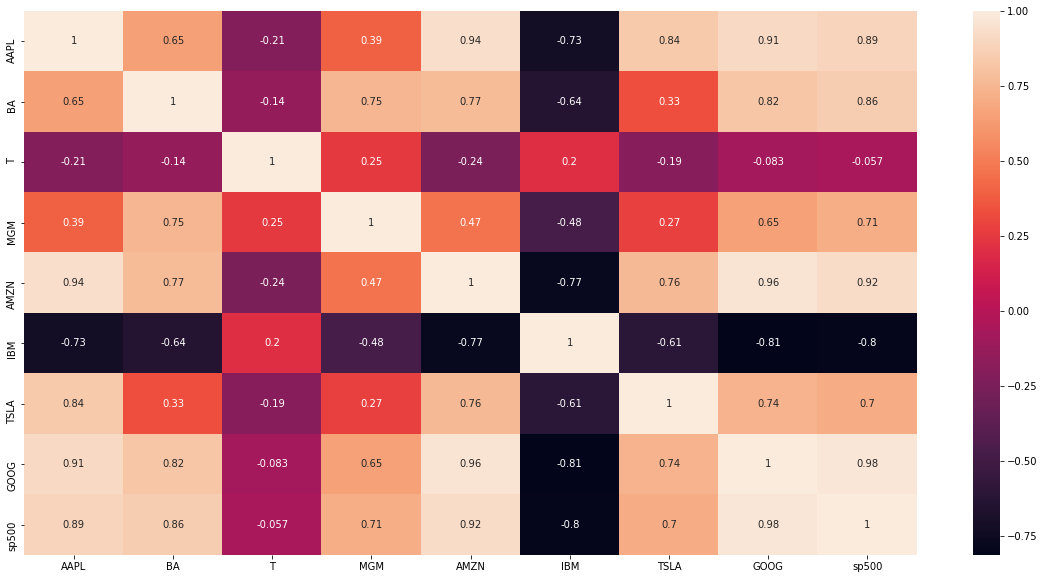

In [7]:
# Correlation plot

plt.figure(figsize=(20,10))
sns.heatmap(stocks_df.corr(),annot=True);

Here the correlation between all the equities is displayed by different colors depending upon their statistical association. On the left hand side the color magnitude is displayed varing form 1.00 to -0.75    

In [8]:
# Basic plot of all the coloumns: depecting price
# Ploting with function

# Plot with function 
def show_plot(df, title):
    df.plot(x='Date', figsize=(20,10), linewidth=2.5, title=title)
    plt.grid()
    plt.show()

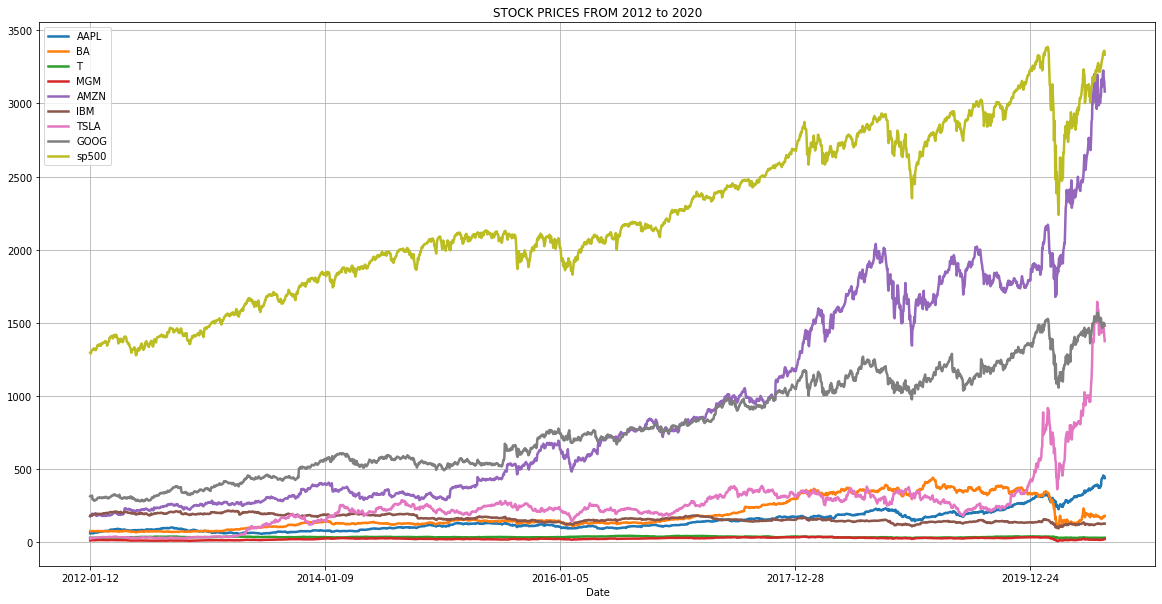

In [9]:
show_plot(stocks_df,'STOCK PRICES FROM 2012 to 2020')

An overview of all the equity prices from 2012 to 2020 on the plot.

##### 1.4 Data Analysis

##### 1.4.1 Analysing the Growth of each equity from 2012 to 2020

**Normalizing** the data to accelarate the calculation and *reduce run time*. Also normalising on the basis of *price change with respect to the previous day*.

**For example:** On 2012-01-12 the *APPL* was ranging at **60.1985**, the next day on 2012-01-13 *APPL* approached **59.9728**, therefore the normalization ratio *(price on n+1th day/price on nth day)*: **0.99625**. 

In [10]:
# Normalizing function

def nor(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [11]:
#Normalizing the stocks_df dataframe

nor(stocks_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,7.313297,2.308039,0.991036,1.378401,18.217644,0.694821,52.567080,4.698347,2.568715
2155,2020-08-06,7.568452,2.280493,0.990704,1.521847,18.331155,0.698532,52.728494,4.782805,2.585226
2156,2020-08-07,7.383066,2.251622,0.996680,1.568838,18.004093,0.692107,51.423361,4.764919,2.586862
2157,2020-08-10,7.490377,2.375977,1.002656,1.784831,17.894390,0.704016,50.214865,4.770052,2.593956


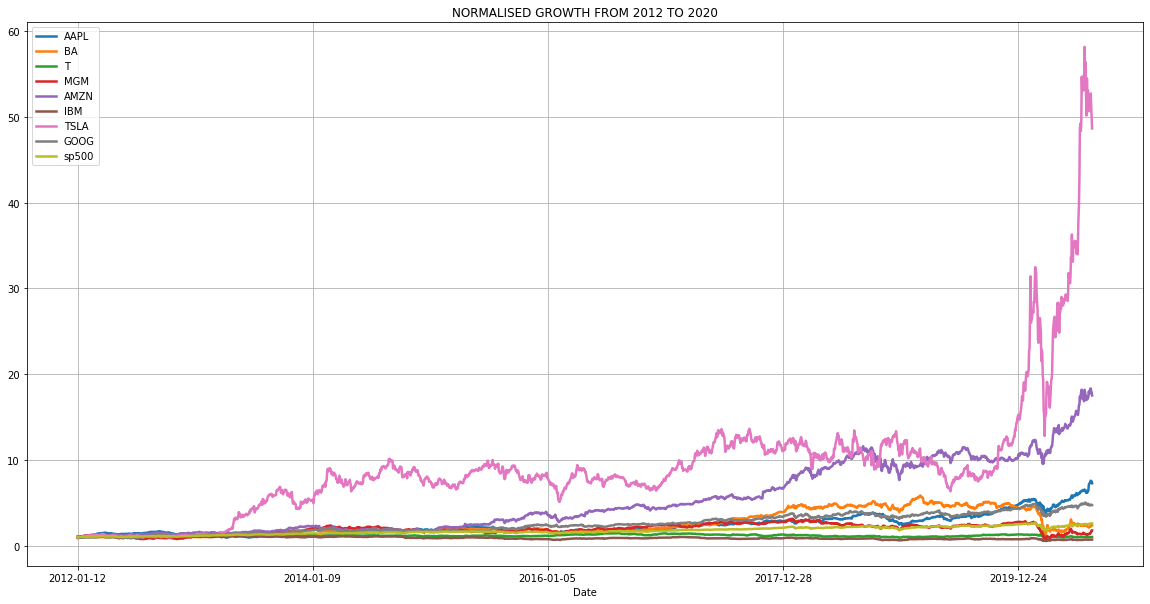

In [12]:
# Ploting the normalised data: DEPECTING THE GROWTH

show_plot(nor(stocks_df), 'NORMALISED GROWTH FROM 2012 TO 2020')

**Normalizing** the data to accelarate the calculation and *reduce run time**. Also normalising on the basis of *price change with respect to the previous day*.

**For example:** On 2012-01-12 the *APPL* was ranging at **60.1985**, the next day on 2012-01-13 *APPL* approached **59.9728**, therefore the normalization of ratio **0.99625**.

Here, we can observe since 2012, **TSLA**(Tesla) is the firm with higgest growth following **AMZN**(Amazon), **APPL**(Apple), **GOOG**(Google) and others as in the figure above.

##### 1.4.2 Analysing the Daily Growth and Price Fluctuation Range for each equity from 2012 to 2020

In [13]:
# Daily Growth Analysis Function

def daily_return(df):
    df_daily_return = df.copy()
    
    for i in df.columns[1:]:
        for j in range(1,len(df)):
            df_daily_return[i][j] = ((df[i][j]-df[i][j-1])/df[i][j-1])*100
        df_daily_return[i][0] = 0
    return df_daily_return 

In [14]:
# Daily Growth Analysis for stocks_df

stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


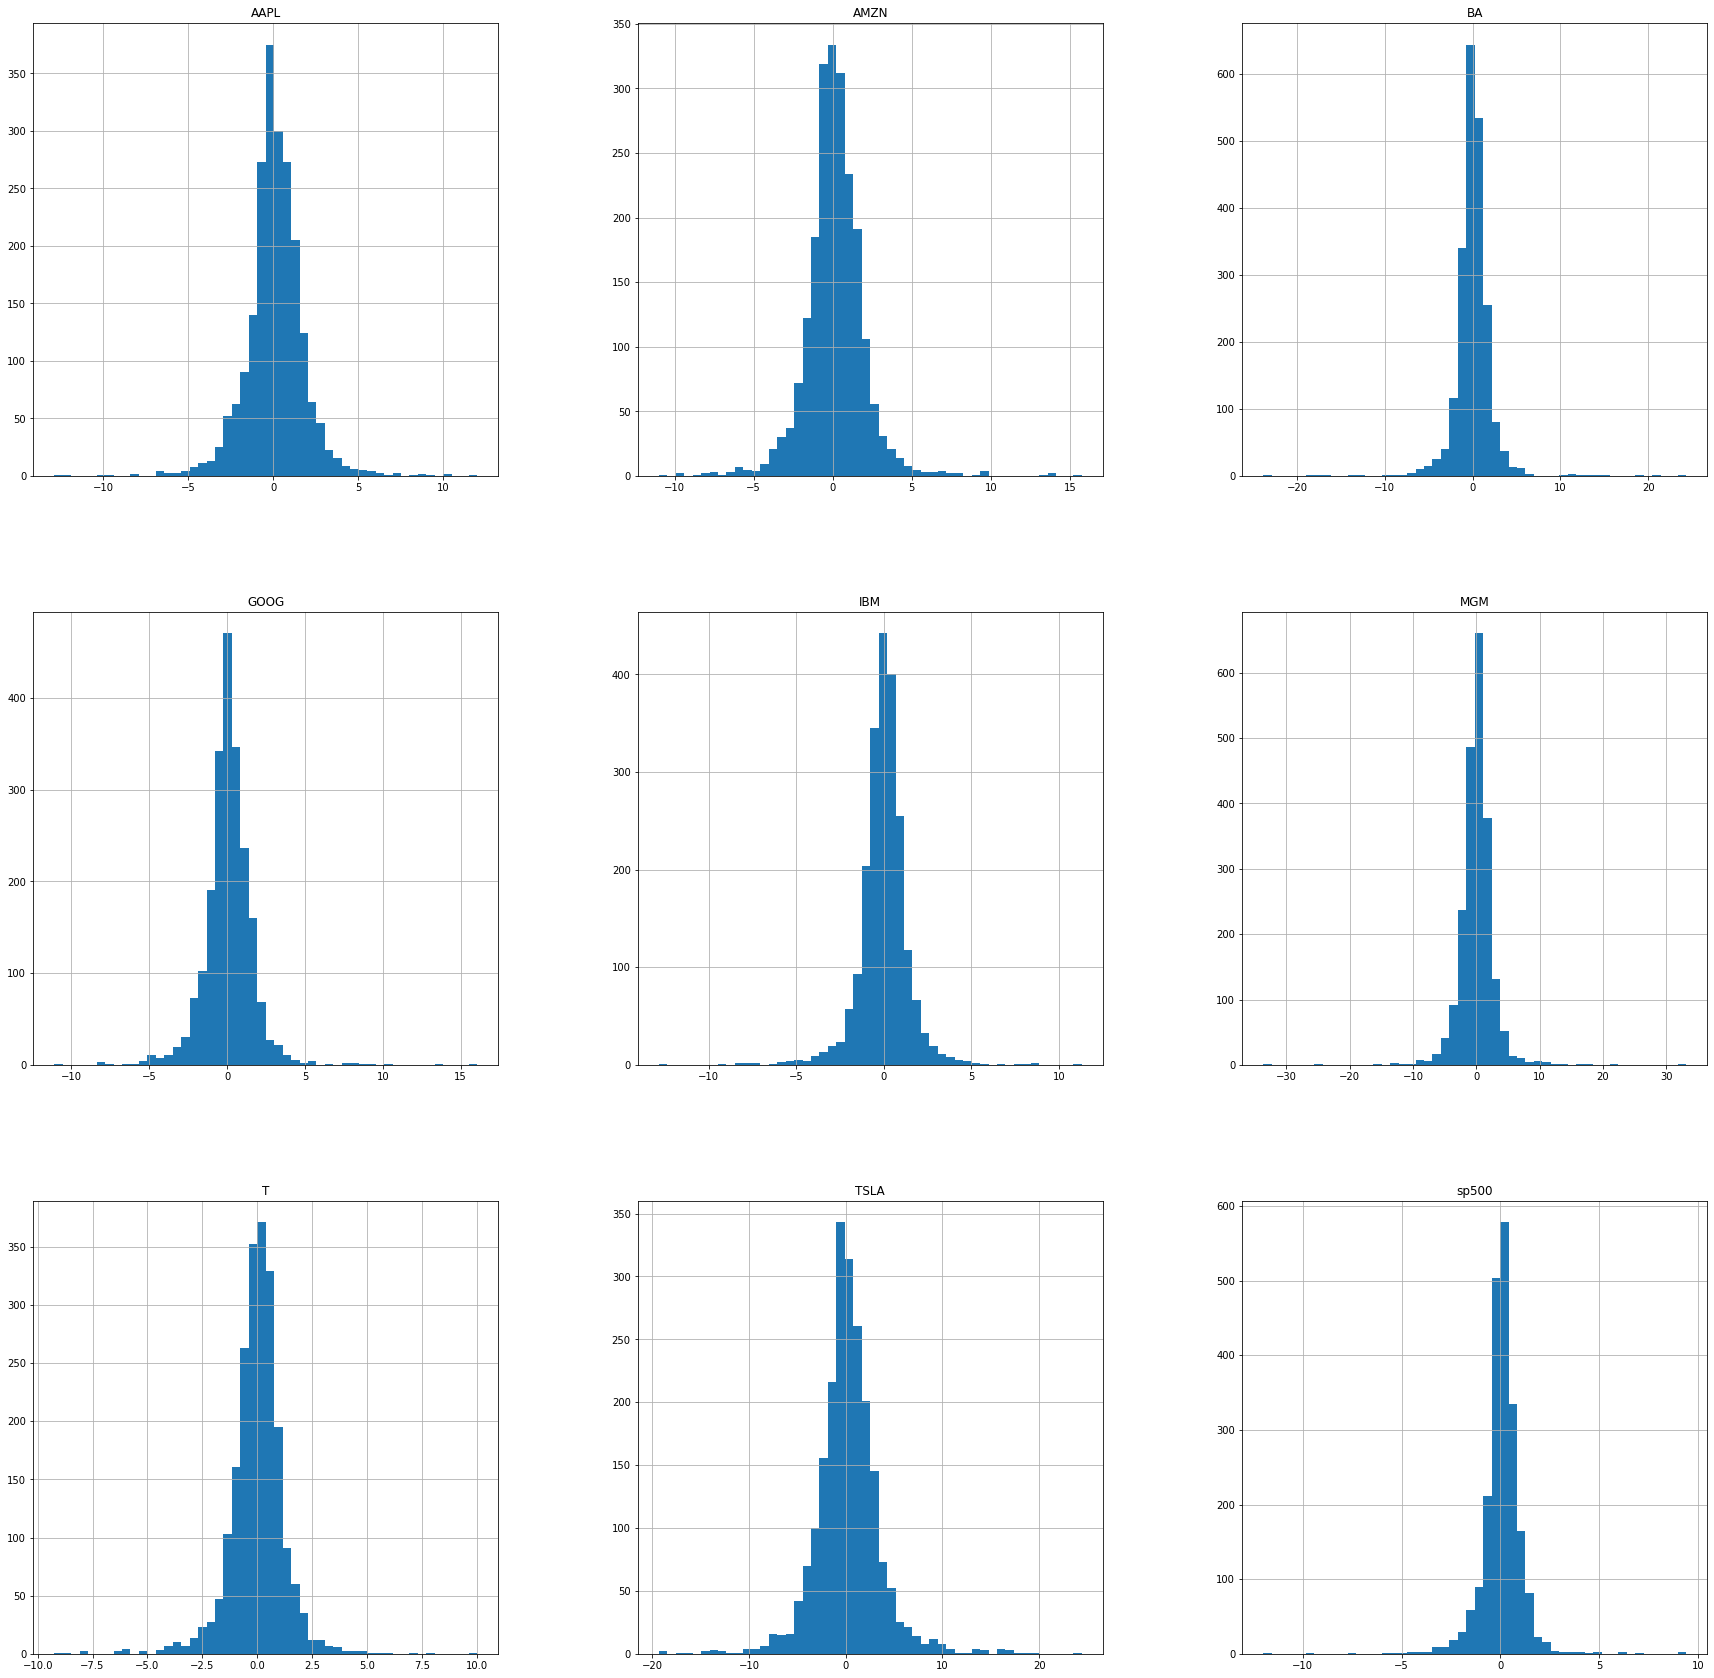

In [15]:
# Histogram for every equity in daily analysis: Price Fluctuation Range

stocks_daily_return.hist(figsize=(30,30),bins=50);

Histogram displaying the Price Fluctuation Range with magnitude for each Fluctuation Range.

From above figures for each equity, it can be concluded that:
1. Since the *Price Fluctuation Range* is least for **T**(AT&T) that is (-10, 10) hence, it is the least volatile equity/stock and therefore most suitable for Less Risk Investments.
2. Since the *Price Fluctuation Range* is highest for **MGM**(MGM Resorts International) with (-25, 25) and **TSLA**(Tesla) with (-20, 20) hence, it they are highly volatile equity/stock and therefore not suitable for Less Risk Investments.


##### 1.4.3 Beta Comparision: Comparing Equities/Stocks

1. **Beta** the slope of the middle line(market return vs selected stock return)

2. **Beta** is used in **CAPM** to describe the relation between systematic risk over expected return:

   1. *Beta = 1.0*; strong correlation with the market, 
   2. *Beta < 1*; less volatile/risky then the market(e.g. Fedral bonds), and
   3. *Beta > 1*; more volatile/risky then the market

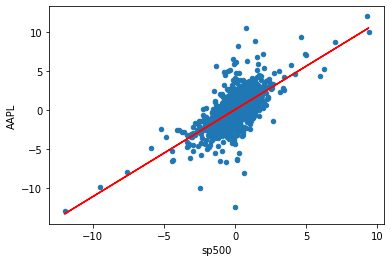

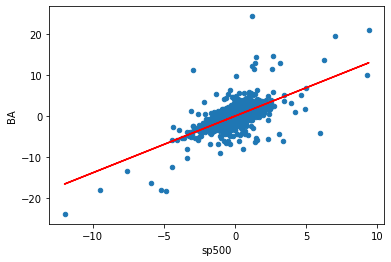

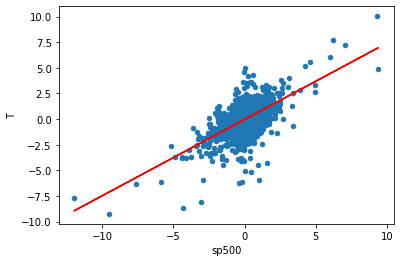

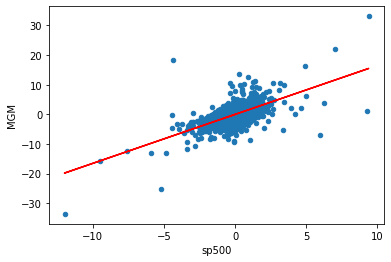

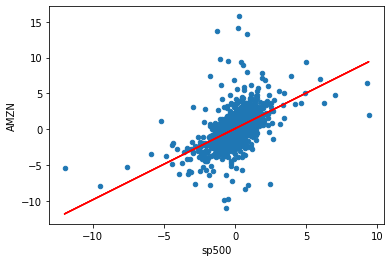

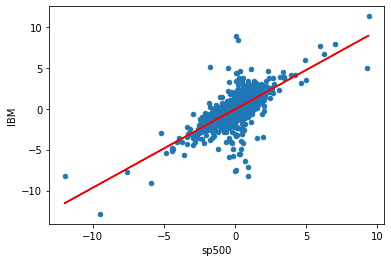

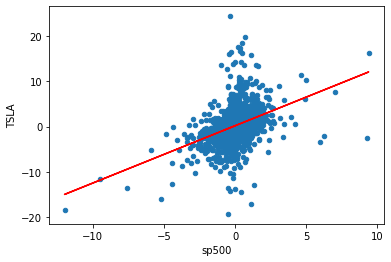

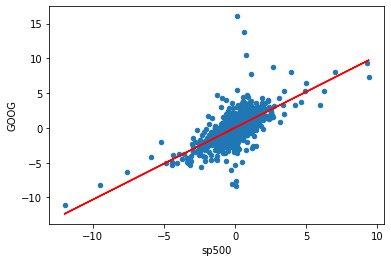

In [16]:
# Calculating BETA

#Default: poly order is 1
beta={}  #empty dictionary
alpha={}

for i in stocks_daily_return.columns:
    if i != 'Date' and i != 'sp500':
        stocks_daily_return.plot(kind='scatter', x='sp500', y=i)
        b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i],1)
        plt.plot(stocks_daily_return['sp500'], b*stocks_daily_return['sp500']+a, 'r')
        
        beta[i] = b
        alpha[i] = a
        plt.show();

In [17]:
beta

{'AAPL': 1.1128924148678103,
 'BA': 1.3828672010892786,
 'T': 0.7446293454747847,
 'MGM': 1.6535677065180128,
 'AMZN': 0.9917345712576848,
 'IBM': 0.9604149148095249,
 'TSLA': 1.2686150101095914,
 'GOOG': 1.0348817687428562}

##### 1.4.4 Calculating portfolio returns using CAPM formula to group of stocks

**CAPM formula:  Er = Rf + (beta * (Rm - Rf))**

*where,*
1. Er: asset expected return
2. Rf: risk-free rate of intrest i.e. federal bonds
3. Rm: expected return
4. beta: sesitivity(fluctuation)

In [18]:
# CAPM formula

Er = {}
Rf = 0  #Default
Rm = stocks_daily_return['sp500'].mean()*252
keys = list(beta.keys())

for i in keys:
    Er[i]  = Rf+(beta[i]*(Rm-Rf))
    
for i in keys:
    print(f'\t\n Expected return for {i} based on CAPM is : {Er[i]} %')

	
 Expected return for AAPL based on CAPM is : 13.830619238640292 %
	
 Expected return for BA based on CAPM is : 17.185766980127916 %
	
 Expected return for T based on CAPM is : 9.25398072050205 %
	
 Expected return for MGM based on CAPM is : 20.549933694065857 %
	
 Expected return for AMZN based on CAPM is : 12.324913942818492 %
	
 Expected return for IBM based on CAPM is : 11.935684726020408 %
	
 Expected return for TSLA based on CAPM is : 15.765882605403192 %
	
 Expected return for GOOG based on CAPM is : 12.861131506762177 %


**Hence, from the above calculation:**
   1. Expexted returns for **MGM**(MGM Resorts International) is higgest; as during the COVID period Hotel and Resort bussiness we highly effected thus in upcoming period of time it will recover the most.
   2. May **T**(AT&T) is least volatile but it is expected to have the least Expexted returns compare to all the mentioned options.
   3. The Expexted returns in decending order are as: *MGM*, *BA*, *TSLA*, *AAPL*, *GOOG*, *AMZN*, *IBM* and *T*.

*Condintionally assume a portfolio case in which a capital of **1M** is to be invested **equally into all the eight equities**. Hence, 1M will be equally invested in eight equity i.e. 0.125M in each*

Then the Expected return would be:

In [19]:
# Dividing the amount into 8 equal parts
portfolio_weight = 1/8 *np.ones(8)  

#Calculating Expected Return

Er_portfolio = sum(list(Er.values())*portfolio_weight)
print(f'Expected Return based on CAPM for the portfolio is: {Er_portfolio} %')

Expected Return based on CAPM for the portfolio is: 14.21348917679255 %


i.e. on investing 1M equally, the portfolio will have Expected Return of 14.213489176 % that is 1,421,489.1767 amount in total. 

##### 1.4.5 Predicting the flow with Machine Learning: Using Ridge Regration

The Ridge regression is a technique which is specialized to analyze multiple regression data which is multicollinearity in nature.

Here the Dataset-2 is used. 

##### 1.4.5.1 Preparing data before ML operations. Function to concatenate the date, stock price & volume in single dataframe

In [20]:
# Individual Stock function

def individual_stock(price_df, vol_df, name):  #name:name of stock: closing price would be starting price of next day
    return pd.DataFrame({'Date':price_df['Date'], 'Close':price_df[name], 'Volume':vol_df[name]})

In [21]:
# Trading Window function(equity trading is only availble for 5days(M,T,W,Th,F) out of 7M,T,W,Th,F,Sa,S)

def trading_window(data):
    n=1 #number of days
    data['Target'] = data[['Close']].shift(-n) #shifting data 'n' days back
    return data

In [22]:
# price_volume_df - Dataframe that contain the individual stock price & volumes

price_volume_df = individual_stock(stocks_df, stock_volume_df, 'AAPL')
price_volume_df.head()

,Date,Close,Volume
0,2012-01-12,60.198570,53146800
1,2012-01-13,59.972858,56505400
2,2012-01-17,60.671429,60724300
3,2012-01-18,61.301430,69197800
4,2012-01-19,61.107143,65434600


In [23]:
# price_volume_target_df - Dataframe with volume, closing price & target(Closing price signifying target as the predicted price for next day)   

price_volume_target_df = trading_window(price_volume_df)

price_volume_target_df = price_volume_target_df[:-1]  #(-1) is to remove the last not-null value
price_volume_target_df.head()

,Date,Close,Volume,Target
0,2012-01-12,60.198570,53146800,59.972858
1,2012-01-13,59.972858,56505400,60.671429
2,2012-01-17,60.671429,60724300,61.301430
3,2012-01-18,61.301430,69197800,61.107143
4,2012-01-19,61.107143,65434600,60.042858


In [24]:
# Let's scale the data, so that the data can be normalised and this can reduce the calculation time of the model

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))  #function object
price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns=['Date']))

price_volume_target_scaled_df #normalised dataframe

array([[0.01102638, 0.11442624, 0.01046185],
       [0.01046185, 0.12362365, 0.01220906],
       [0.01220906, 0.13517696, 0.01378478],
       ...,
       [1.        , 0.10747163, 0.97208751],
       [0.97208751, 0.10431171, 0.98824476],
       [0.98824476, 0.11430054, 0.95470465]])

In [25]:
# While building any ML or AI models seprating the input(features) & output(target) is important

X = price_volume_target_scaled_df[:,:2] #all rows, columns upto 2
Y = price_volume_target_scaled_df[:,2:] #all rows, columns after 2

In [26]:
# Seprating the data for traing and testing purpose
# Here we used (65% for traning & 35% for testing)

split_point = int(0.65*len(X))  #1511 rows taken under split_point

X_train = X[:split_point]
Y_train = Y[:split_point]
#X_train.shape

X_test = X[split_point:]
Y_test = Y[split_point:]
Y_test.shape

(756, 1)

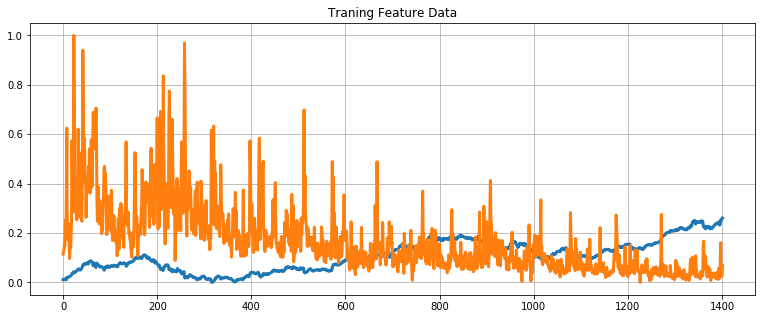

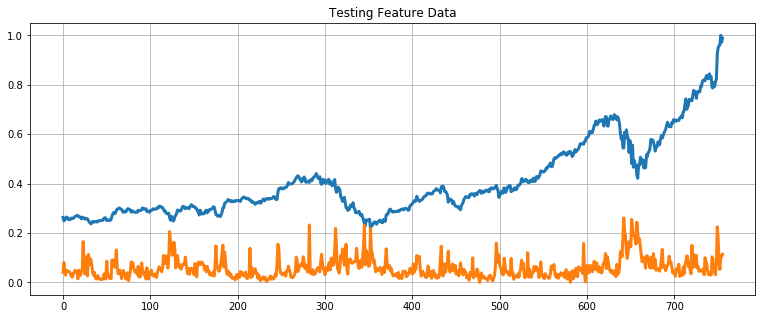

In [27]:
# Displaying the X_testing & X_training data

def show_plots(data, title):                             #show_plot: for data frames, show_plots: for arrary
    plt.figure(figsize=(13,5))
    plt.plot(data, linewidth=3)
    plt.title(title)
    plt.grid()
    
show_plots(X_train, 'Traning Feature Data')
show_plots(X_test, 'Testing Feature Data')


In [28]:
# Ridge regration: linear least square

regression_model = Ridge()
regression_model.fit(X_train, Y_train)

#(NOTE: Greater the alpha = greater the error)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [29]:
# Calculating model's accuracy 

lr_accuracy = regression_model.score(X_test, Y_test)
print('Ridge Regression Score: ', lr_accuracy)

Ridge Regression Score:  0.7950028030821754


In [30]:
# Making prediction with the entire dataset

predicted_prices = regression_model.predict(X)

# Apened the predicted_prices values into a list

predicted = []                          #empty list
for i in predicted_prices:
    predicted.append(i[0])
    
len(predicted)

2158

In [31]:
# Abstract the value of 'close'-closing price from price_volume_target_scaled_df to make a final comparision

close = []                            #empty list
for i in price_volume_target_scaled_df:
    close.append(i[0])
    
len(close)

2158

lenght of Predicted Price list and Close list matches.
Now, they can be converted into dataframe

In [32]:
# Creating the dataframe for final comparision

df_prediction = price_volume_target_df[['Date']]

df_prediction['Original Price'] = close
df_prediction['Predicted Price'] = predicted
df_prediction.head()

,Date,Original Price,Predicted Price
0,2012-01-12,0.011026,0.034664
1,2012-01-13,0.010462,0.033746
2,2012-01-17,0.012209,0.034519
3,2012-01-18,0.013785,0.034556
4,2012-01-19,0.013299,0.034707


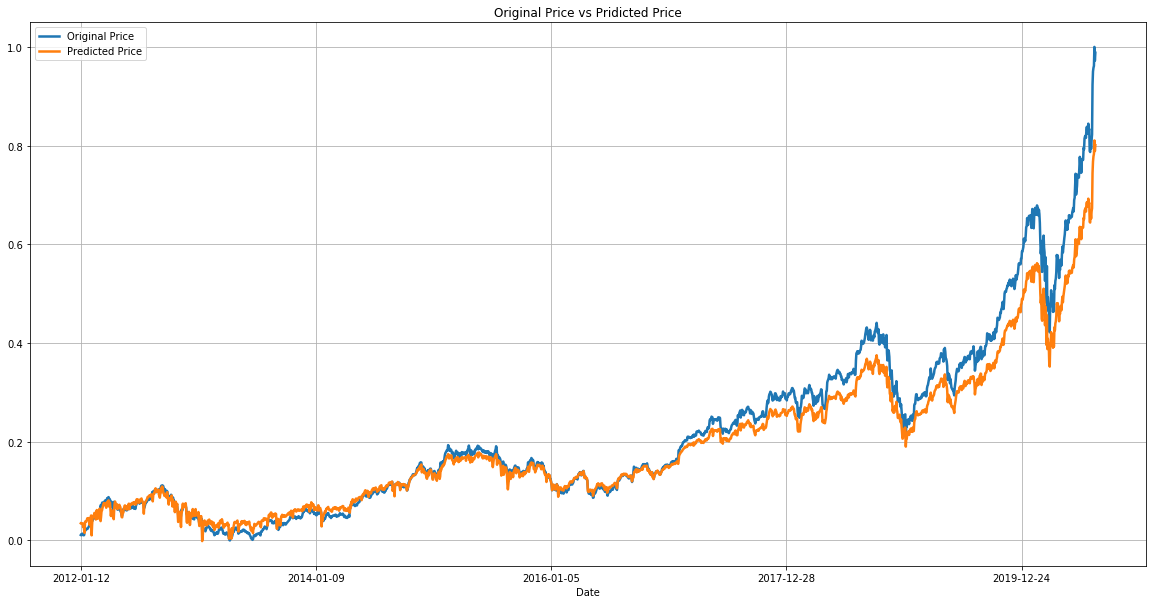

In [33]:
# Finally, ploting the graph for testing performance

show_plot(df_prediction, 'Original Price vs Pridicted Price')

The above graph shows the performance of Regression. In the process, *65%* of the data was used to train the model and the other *35%* was used for testing the model.  

Moreover, The model pridicted a very similar output as the original observations. It followed ML concepts and used the analysed data for successful pridiction.

______________________________________________________________________________________________________________________________